# Project 3: Investigate a data set: TMDB movie dataset

### Data Description:

This data set contains information about 10k+ movies collected from The Movie Database (TMDb), including user ratings, revenue and 
budget.

* The data set has 21 movie attributes and 10866 rows (excluding header).
<br>
* Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
<br>
* The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.
<br>

### Questions which I'm planning to explore in this analysis:
Q1) What is the average runtime of movies over the years?
<br>
Q2) Which genres are most popular ?
<br>
Q3) Which actors acted often over the years?
<br>
Q4) How budget of movies changes over the years ?
<br>
Q5) How profit of movies changes over the years ?
<br>
Q6) What is the genre of profitable movies ? Which actors & director frequently acted & directed most profitable movies?

First step is to import packages which I am expecting to use for this project.

In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt

In [2]:
# reading dataset 
tmdb = pd.read_csv ('tmdb-movies.csv')
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

 ### Data Cleaning 
 1) Delete duplicate records from the dataset
<br>
 2) Dropping records where imdb_id is NULL
<br> 
3) Keeping columns which are required for analysis
<br>    

The rest of the data cleaning and wrangling steps we are going to perform when we individually look into different problems.

In [3]:
#checking for duplicate records
sum(tmdb.duplicated())

1

In [4]:
#removing duplicate row
tmdb.drop_duplicates(inplace=True)
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
id                      10865 non-null int64
imdb_id                 10855 non-null object
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
homepage                2936 non-null object
director                10821 non-null object
tagline                 8041 non-null object
keywords                9372 non-null object
overview                10861 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              1

In [5]:
#checking null values in other columns
tmdb.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [6]:
# to drop records where we have null imdb_id
tmdb.dropna(subset=['imdb_id'], inplace=True)

rows, col = tmdb.shape
print('After cleaning, we now have only {} entries of movies.'.format(rows-1))

After cleaning, we now have only 10854 entries of movies.


In [7]:
#keeping columns which are required for analysis
del_col = [ 'id', 'imdb_id', 'popularity','homepage', 'keywords', 'overview', 'production_companies', 'vote_count', 'vote_average']

 #deleting the columns from the dataset
tmdb_data = tmdb.drop(del_col,1)
tmdb_data.dropna(subset=['genres'], inplace=True)

rows, col = tmdb_data.shape
print('After cleaning, we now have only {} entries of movies.'.format(rows-1))

tmdb_data.head(6)

After cleaning, we now have only 10833 entries of movies.


,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year,budget_adj,revenue_adj
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015,1.379999e+08,1.392446e+09
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015,1.379999e+08,3.481613e+08
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,2015,1.012000e+08,2.716190e+08
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015,1.839999e+08,1.902723e+09
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,4/1/15,2015,1.747999e+08,1.385749e+09
5,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",156,Western|Drama|Adventure|Thriller,12/25/15,2015,1.241999e+08,4.903142e+08


# Data Exploration

#### Q1) What is the average runtime over the years?

Before we try to answer this question. First we need to exclude movies from our analysis which has runtime of 0 mins.

In [8]:
check_row = ['runtime']

#to replace 0 with NaN
tmdb_data[check_row] = tmdb_data[check_row].replace(0, np.NaN)

#to drop rows which has NaN
tmdb_data.dropna(subset = check_row, inplace = True)

rows, col = tmdb_data.shape
print('After cleaning, we now have only {} entries of movies.'.format(rows-1))

After cleaning, we now have only 10803 entries of movies.


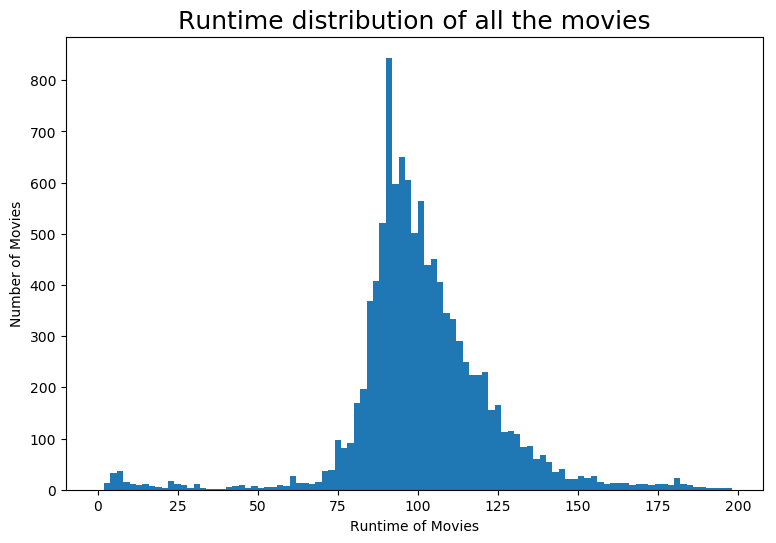

In [9]:
#giving the figure size(width, height)
plt.figure(figsize=(9,6), dpi = 100)
plt.xlabel('Runtime of Movies')
plt.ylabel('Number of Movies')
plt.title('Runtime distribution of all the movies', fontsize=18)
bins = np.arange(0,200,2)
#giving a histogram plot
plt.hist(tmdb_data['runtime'],bins)
#displays the plot
plt.show()

We can infer from this histogram, the majority of movies have runtimes between 90 and 110 mins. 

In [10]:
tmdb_data['runtime'].describe()

count    10804.000000
mean       102.446409
std         30.840781
min          2.000000
25%         90.000000
50%         99.000000
75%        112.000000
max        900.000000
Name: runtime, dtype: float64

By looking at the both the histogram and descriptive statistics of the runtime, it is clear that average runtime is 102 mins and median runtime value is 99 mins.

#### Q2) Which genres are most popular ?

Before we try to answer this question, first we need to remove movies from our dataset where genres is NULL.

In [11]:
tmdb_data.dropna(subset=['genres'], inplace=True)

rows, col = tmdb_data.shape
print('After cleaning, we now have only {} entries of movies.'.format(rows-1))

After cleaning, we now have only 10803 entries of movies.


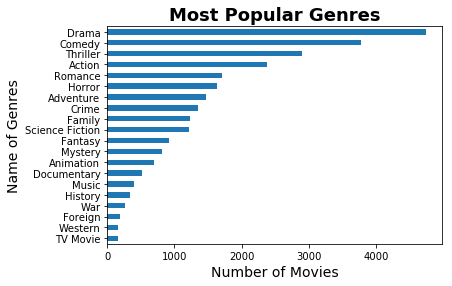

In [12]:
#extracting different genres and adding it in the data  
list_genres = tmdb_data['genres'].str.cat(sep="|").split("|")
list_genres = pd.Series(list_genres).value_counts(ascending=True)

bar_graph = list_genres.plot.barh()
bar_graph.set_title("Most Popular Genres", fontsize=18, fontweight='bold')
bar_graph.set_xlabel("Number of Movies", fontsize=14)
bar_graph.set_ylabel("Name of Genres", fontsize=14)

We can easily infer from this horizontal bar graph that Drama is the most common genre among movies followed by Comedy and Thriller.

#### Q3) Which actors and directors often acted and directed movies over the years?

Before we look for an answer, first we need to remove movies from our dataset where cast is NULL.

In [13]:
tmdb_data.dropna(subset=['cast'], inplace=True)

rows, col = tmdb_data.shape
print('After cleaning, we now have only {} entries of movies.'.format(rows-1))

After cleaning, we now have only 10728 entries of movies.


In [14]:
#extracting different actors and adding it in the data  
list_actors = tmdb_data['cast'].str.cat(sep="|").split("|")
list_actors = pd.Series(list_actors).value_counts(ascending=False)

list_actors.head(5)

Robert De Niro       72
Samuel L. Jackson    71
Bruce Willis         62
Nicolas Cage         61
Michael Caine        53
dtype: int64

In [15]:
#top 5 directors who directed profitable movies
list_director = tmdb_data['director'].str.cat(sep="|").split("|")
list_director = pd.Series(list_director).value_counts(ascending=False)

list_director.head(5)

Woody Allen          46
Clint Eastwood       34
Steven Spielberg     30
Martin Scorsese      30
Steven Soderbergh    23
dtype: int64

From the above frequency table, we can confirm Robert De Niro has acted most in movies followed by Samuel Jackson and Bruce Willis.
<br>
Woody Allen has directed most movies during this time period followed by Clint Eastwood and Steven Spielberg.

#### Q4) How budget of movies changes over the years ?

In [16]:
#group the dataset according to release year
movie_data = tmdb_data.groupby(['release_year'],as_index=False).mean()
movie_data.head()

,release_year,budget,revenue,runtime,budget_adj,revenue_adj
0,1960,6.892796e+05,4.531406e+06,110.656250,5.082036e+06,3.340991e+07
1,1961,1.488290e+06,1.089420e+07,119.419355,1.085687e+07,7.947167e+07
2,1962,1.710066e+06,6.736870e+06,124.343750,1.232693e+07,4.856238e+07
3,1963,2.156809e+06,5.511911e+06,111.323529,1.535687e+07,3.924580e+07
4,1964,9.400753e+05,8.118614e+06,109.214286,6.608980e+06,5.707603e+07


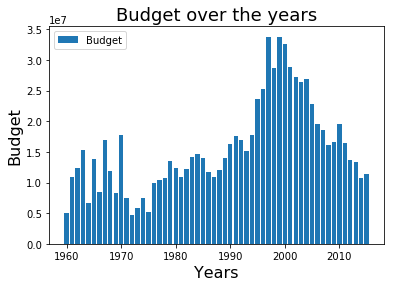

In [17]:
fig = plt.bar(movie_data["release_year"], movie_data["budget_adj"])

plt.title('Budget over the years', fontsize=18)
plt.xlabel('Years', fontsize=16)
plt.ylabel('Budget', fontsize=16)
plt.legend(fig, ['Budget'], loc = "upper left")
plt.show()

I've used budget_adj instead of budget in the analysis, as it is adjusted for inflation.  We can see from bar plot, the average adjusted budget of movies has approximately increased from 1960 to 2000 and then decreased.

#### Q5) How profit of movies changes over the years ?

In [18]:
#to calculate profit
movie_data['profit_adj'] = movie_data['revenue_adj'] - movie_data['budget_adj']
movie_data.head(2)

,release_year,budget,revenue,runtime,budget_adj,revenue_adj,profit_adj
0,1960,6.892796e+05,4.531406e+06,110.656250,5.082036e+06,3.340991e+07,2.832787e+07
1,1961,1.488290e+06,1.089420e+07,119.419355,1.085687e+07,7.947167e+07,6.861480e+07


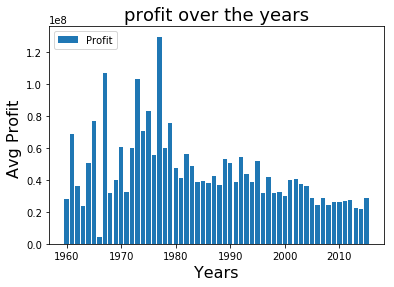

In [19]:
fig = plt.bar(movie_data["release_year"], movie_data["profit_adj"])

plt.title('profit over the years', fontsize=18)
plt.xlabel('Years', fontsize=16)
plt.ylabel('Avg Profit ', fontsize=16)
plt.legend(fig, ['Profit'], loc = "upper left")
plt.show()

Average adjusted profit made by movies has intially increased from 1960 to 1980 and then decreased.

#### Q6) What is the genre of profitable movies ? Which actors & director frequently acted & directed most profitable movies?

In [20]:
#to calculate profit
tmdb_data['profit_adj'] = tmdb_data['revenue_adj'] - tmdb_data['budget_adj']

profitable_movies = tmdb_data.query('profit_adj > 0')
rows, col = profitable_movies.shape
print('{} movies have made profit over these years.'.format(rows-1))

3770 movies have made profit over these years.


In [21]:
#top 5 genres of profitable movies
list_profit_genres = profitable_movies['genres'].str.cat(sep="|").split("|")
list_profit_genres = pd.Series(list_profit_genres).value_counts(ascending=False)

list_profit_genres.head(5)

Drama       1690
Comedy      1423
Thriller    1058
Action       963
Romance      684
dtype: int64

In [22]:
#top 5 actors who acted in profitable movies
list_profit_cast = profitable_movies['cast'].str.cat(sep="|").split("|")
list_profit_cast = pd.Series(list_profit_cast).value_counts(ascending=False)

list_profit_cast.head(5)

Robert De Niro       46
Tom Hanks            36
Morgan Freeman       36
Bruce Willis         35
Samuel L. Jackson    34
dtype: int64

In [23]:
#top 5 directors who directed profitable movies
list_profit_director = profitable_movies['director'].str.cat(sep="|").split("|")
list_profit_director = pd.Series(list_profit_director).value_counts(ascending=False)

list_profit_director.head(5)

Steven Spielberg    27
Clint Eastwood      23
Ridley Scott        17
Woody Allen         17
Ron Howard          16
dtype: int64

From above three frequency chart, we can see Drama is the most profitable genre followed by Comedy and Thriller. 
<br>
Robert De Niro, Tom Hanks and Morgan Freeman have given most profitable movies. 
<br>
Steven Spielberg has directed most profitable movies(27), followed by Clint Eastwood(23) and Ridley Scott(17). 

# Conclusion

Drama is the most common genre among movies followed by Comedy and Thriller. Drama is the popular genre among the profitable movies as well.
<br>
Woddy Allen and Clint Eastwood have directed most movies, but when it comes to profitable movies Steven Spielberg directed most of them.
<br>
Average runtime of movies is 102 mins.
<br> 
From the profit and the budget over the time we found that the average adjusted budget of movies is increasing, but adjusted average profit of movies is decreasing. 
<br>

Limitation of this study: 
<br>
* Limited dataset, the dataset has data of movies which were released over a span of 50+ years. But given the quantity of data, it seems
it is a sample of complete dataset. This sample may not be the true representative of the population.
<br>
* There are values in variables which doesn't make any sense. Like runtime value of 2 mins for a movie  or budget of 0 for a movie. Conclusion
of the analysis depends on the validity of the data.